## THE BRIDGE (Data Science Bootcamp - Agosto 2020)
##  PROYECTO GRUPO D 
________________
### Análisis de datos asociados al COVID-19 del grupo de paises conformado por Portugal, Venezuela, Turquía, Reino Unido y España.

Fuente de datos (Data Set)  "https://covid.ourworldindata.org/data/owid-covid-data.csv"

Team members: 
- José Luis Manjon-->   presimanjon@yahoo.es
- Filipa Teles------>   filipa.teles@icloud.com
- Mónica Villasuso-->   villasuso.monica@gmail.com

In [32]:
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import json  
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# print the graphs in the notebook
%matplotlib inline

# set seaborn style to white
sns.set_style("white")

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
covid_general = pd.read_csv(url,parse_dates=['date'], sep=",")
covid_general

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.0,0.0,18.733,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.0,0.0,37.465,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-24,12.0,8.0,0.0,0.0,112.395,74.930,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-25,17.0,5.0,0.0,0.0,159.227,46.831,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-26,19.0,2.0,0.0,0.0,177.959,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34659,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34660,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34661,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Otra forma de haber pasado a datetime si no hubiera usado el comando parse_dates al descargar la data seria ejecutar lo siguiente:  covid_grupoD['date']=pd.to_datetime(covid_grupoD['date'],format="%Y-%m-%d")
                        covid_grupoD

In [3]:
paises_grupoD=["GBR","PRT", "VEN", "TUR", "ESP"]
covid_grupoD=covid_general[covid_general.iso_code.isin(paises_grupoD)]
covid_grupoD.sort_values(by='date', ascending=True, inplace=True)
covid_grupoD

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
9896,ESP,Europe,Spain,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
11518,GBR,Europe,United Kingdom,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32
9897,ESP,Europe,Spain,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
11519,GBR,Europe,United Kingdom,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32
9898,ESP,Europe,Spain,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31619,TUR,Asia,Turkey,2020-08-03,232856.0,987.0,5728.0,18.0,2760.951,11.703,...,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69
11735,GBR,Europe,United Kingdom,2020-08-04,305623.0,928.0,46210.0,9.0,4502.003,13.670,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32
26173,PRT,Europe,Portugal,2020-08-04,51569.0,106.0,1738.0,0.0,5057.417,10.396,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05
31620,TUR,Asia,Turkey,2020-08-04,233851.0,995.0,5747.0,19.0,2772.748,11.798,...,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69


In [ ]:
# Es una mascara que me dará una nueva tabla en la que aparecerán únicamente los cinco paises asignados, es algo equivalente a lo ejecutado anteriormente
#   covid_general2[(covid_general2.iso_code == 'TUR') | (covid_general2.iso_code == 'PRT') | (covid_general2.iso_code == 'GBR') | (covid_general2.iso_code == 'VEN') | (covid_general2.iso_code == 'ESP')]

In [ ]:
# Coloco como índice la columna de la fecha
# covid_grupoD.set_index(["date"],inplace=True)

## DATA WRANGLING

In [4]:
# Obtengo el número de NaN totales en el dataframe
covid_grupoD.isnull().sum().sum() 

5116

In [5]:
covid_grupoD.info()# queriamos ver el tipo Dtype de cada columna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 9896 to 33181
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         878 non-null    object        
 1   continent                        878 non-null    object        
 2   location                         878 non-null    object        
 3   date                             878 non-null    datetime64[ns]
 4   total_cases                      876 non-null    float64       
 5   new_cases                        876 non-null    float64       
 6   total_deaths                     876 non-null    float64       
 7   new_deaths                       876 non-null    float64       
 8   total_cases_per_million          876 non-null    float64       
 9   new_cases_per_million            876 non-null    float64       
 10  total_deaths_per_million         876 non-null    float64 

In [14]:
covid_grupoD.isnull().sum() # Numero de NaN en el dataframe por columnas

iso_code                             0
continent                            0
location                             0
date                                 0
total_cases                          2
new_cases                            2
total_deaths                         2
new_deaths                           2
total_cases_per_million              2
new_cases_per_million                2
total_deaths_per_million             2
new_deaths_per_million               2
new_tests                          479
total_tests                        452
total_tests_per_thousand           452
new_tests_per_thousand             479
new_tests_smoothed                 377
new_tests_smoothed_per_thousand    377
tests_units                        349
stringency_index                    35
population                           0
population_density                   0
median_age                           0
aged_65_older                        0
aged_70_older                        0
gdp_per_capita           

Comparando el nº de filas del datafrema con el numero de valores no nulos en cada columna (por ejemplo total_cases y total_deaths) podemos inferir que en bastantes de ellas hay solamente dos valores nulos. Vamos a localizar en que lugar se encuentran para tomar una decisión sobre ellos. 

La columna llamada 'handwashing_facilities' tiene todos sus elementos tipo Nan y la columna 'continent' no aporta nada a nuestro estudio por lo que las eliminaremos del dataframe. 

Empiezo a analizar los valores NaN que contiene la tabla. A continuación distintas opciones para tratar a los NaN.
Sustituirlos por un valor determinad: df_nuevo = df.fillna(value=3)
Reemplazar por el valor promedio de la columna df_nuevo = df.fillna(df.mean())
interpolando con el resto de datos conocidos se usa la función interpolate: df_inter = df.interpolate(method='linear'). Otros metodos de interpolación: ‘linear’, ‘time’, ‘index’, ‘values’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘barycentric’, ‘krogh’, ‘polynomial’, ‘spline’ ‘piecewise_polynomial’, ‘pchip’.

In [6]:
covid_grupoD.drop(axis=1, columns=['handwashing_facilities', 'continent'], inplace=True)

In [7]:
# Veo la cantidad de NaN que todavía permanecen en la tabla
covid_grupoD.isnull().sum().sum() 

4238

In [8]:
# Nos indica donde se encuentran los NaN
null_columns=covid_grupoD.columns[covid_grupoD.isnull().any()]
covid_grupoD[null_columns].isnull().sum()
covid_grupoD[covid_grupoD.isnull().any(axis=1)][null_columns].head()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,...,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,extreme_poverty,female_smokers,male_smokers
9896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,27.4,31.4
11518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,20.0,24.7
9897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,27.4,31.4
11519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.2,20.0,24.7
9898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,27.4,31.4


In [9]:
covid_grupoD

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
9896,ESP,Spain,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,2.97,83.56
11518,GBR,United Kingdom,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
9897,ESP,Spain,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,2.97,83.56
11519,GBR,United Kingdom,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
9898,ESP,Spain,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,2.97,83.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31619,TUR,Turkey,2020-08-03,232856.0,987.0,5728.0,18.0,2760.951,11.703,67.916,...,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,2.81,77.69
11735,GBR,United Kingdom,2020-08-04,305623.0,928.0,46210.0,9.0,4502.003,13.670,680.700,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
26173,PRT,Portugal,2020-08-04,51569.0,106.0,1738.0,0.0,5057.417,10.396,170.447,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
31620,TUR,Turkey,2020-08-04,233851.0,995.0,5747.0,19.0,2772.748,11.798,68.142,...,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,2.81,77.69


Renombramos la columna iso_code como country que es más intuitivo

In [10]:
covid_grupoD.rename(columns={"iso_code": "country"}, inplace=True)


A continuación vamos a analizar cuando empezarón a reportar información cada uno de los paises de nuestro grupo de análisis

In [11]:
#  El primer dato de cualquiera de los paises de estudio se da en la fecha siguiente
covid_datos = covid_grupoD[(covid_grupoD['country'].isin(paises_grupoD)) & (covid_grupoD.total_cases >0)]
covid_datos.date.min()

Timestamp('2020-02-01 00:00:00')

## PORTUGAL

In [20]:
# El inicio de los datos
covid_grupoD[covid_grupoD['country']== 'PRT']

,country,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
25862,PRT,Portugal,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
25863,PRT,Portugal,2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
25864,PRT,Portugal,2020-03-03,2.0,2.0,0.0,0.0,0.196,0.196,0.000,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
25865,PRT,Portugal,2020-03-04,4.0,2.0,0.0,0.0,0.392,0.196,0.000,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
25866,PRT,Portugal,2020-03-05,5.0,1.0,0.0,0.0,0.490,0.098,0.000,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26013,PRT,Portugal,2020-07-30,50613.0,203.0,1725.0,3.0,4963.661,19.908,169.172,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
26014,PRT,Portugal,2020-07-31,50868.0,255.0,1727.0,2.0,4988.669,25.008,169.368,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
26015,PRT,Portugal,2020-08-01,51072.0,204.0,1735.0,8.0,5008.676,20.006,170.153,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
26016,PRT,Portugal,2020-08-02,51310.0,238.0,1737.0,2.0,5032.017,23.341,170.349,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05


Los dos primeros registros de Portugal del 1 y el 2 de Marzo son registros NaN por lo que se eliminan del dataframe al no aportar ninguna información.

In [12]:
#  PORTUGAL
covid_dates_prt = covid_grupoD[(covid_grupoD['country']== 'PRT') & (covid_grupoD.new_cases>0)]
covid_dates_prt.head()


,country,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
26019,PRT,Portugal,2020-03-03,2.0,2.0,0.0,0.0,0.196,0.196,0.0,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
26020,PRT,Portugal,2020-03-04,4.0,2.0,0.0,0.0,0.392,0.196,0.0,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
26021,PRT,Portugal,2020-03-05,5.0,1.0,0.0,0.0,0.490,0.098,0.0,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
26022,PRT,Portugal,2020-03-06,9.0,4.0,0.0,0.0,0.883,0.392,0.0,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
26023,PRT,Portugal,2020-03-07,13.0,4.0,0.0,0.0,1.275,0.392,0.0,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05


## ESPAÑA

In [13]:
# ESPAÑA
#  Ahora buscamos el primer dia en el que el España comunica el primer caso. Los registros anteriores a esta fecha no es necesario analizarlo ya que no existen datos de covid.
covid_dates_esp = covid_grupoD[(covid_grupoD['country']== 'ESP') & (covid_grupoD.new_cases>0)]
covid_dates_esp

,country,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
9928,ESP,Spain,2020-02-01,1.0,1.0,0.0,0.0,0.021,0.021,0.000,...,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,2.97,83.56
9937,ESP,Spain,2020-02-10,2.0,1.0,0.0,0.0,0.043,0.021,0.000,...,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,2.97,83.56
9952,ESP,Spain,2020-02-25,3.0,1.0,0.0,0.0,0.064,0.021,0.000,...,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,2.97,83.56
9953,ESP,Spain,2020-02-26,9.0,6.0,0.0,0.0,0.192,0.128,0.000,...,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,2.97,83.56
9954,ESP,Spain,2020-02-27,17.0,8.0,0.0,0.0,0.364,0.171,0.000,...,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,2.97,83.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,ESP,Spain,2020-07-28,280610.0,1828.0,28436.0,2.0,6001.739,39.098,608.194,...,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,2.97,83.56
10107,ESP,Spain,2020-07-29,282641.0,2031.0,28441.0,5.0,6045.178,43.439,608.301,...,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,2.97,83.56
10108,ESP,Spain,2020-07-30,285430.0,2789.0,28443.0,2.0,6104.830,59.652,608.344,...,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,2.97,83.56
10109,ESP,Spain,2020-07-31,288522.0,3092.0,28445.0,2.0,6170.962,66.132,608.387,...,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,2.97,83.56


## VENEZUELA

In [14]:
# VENEZUELA
covid_dates_ven = covid_grupoD[(covid_grupoD['country']== 'VEN') & (covid_grupoD.new_cases>0)]
covid_dates_ven

,country,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
33040,VEN,Venezuela,2020-03-15,10.0,10.0,0.0,0.0,0.352,0.352,0.000,...,6.614,3.915,16745.022,NaN,204.85,6.47,NaN,NaN,0.8,72.06
33041,VEN,Venezuela,2020-03-16,15.0,5.0,0.0,0.0,0.528,0.176,0.000,...,6.614,3.915,16745.022,NaN,204.85,6.47,NaN,NaN,0.8,72.06
33042,VEN,Venezuela,2020-03-17,33.0,18.0,0.0,0.0,1.161,0.633,0.000,...,6.614,3.915,16745.022,NaN,204.85,6.47,NaN,NaN,0.8,72.06
33046,VEN,Venezuela,2020-03-21,36.0,3.0,0.0,0.0,1.266,0.106,0.000,...,6.614,3.915,16745.022,NaN,204.85,6.47,NaN,NaN,0.8,72.06
33049,VEN,Venezuela,2020-03-24,84.0,48.0,0.0,0.0,2.954,1.688,0.000,...,6.614,3.915,16745.022,NaN,204.85,6.47,NaN,NaN,0.8,72.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33175,VEN,Venezuela,2020-07-29,16571.0,583.0,151.0,5.0,582.748,20.502,5.310,...,6.614,3.915,16745.022,NaN,204.85,6.47,NaN,NaN,0.8,72.06
33177,VEN,Venezuela,2020-07-31,17859.0,1288.0,158.0,7.0,628.043,45.295,5.556,...,6.614,3.915,16745.022,NaN,204.85,6.47,NaN,NaN,0.8,72.06
33178,VEN,Venezuela,2020-08-01,18574.0,715.0,164.0,6.0,653.187,25.144,5.767,...,6.614,3.915,16745.022,NaN,204.85,6.47,NaN,NaN,0.8,72.06
33179,VEN,Venezuela,2020-08-02,19443.0,869.0,169.0,5.0,683.747,30.560,5.943,...,6.614,3.915,16745.022,NaN,204.85,6.47,NaN,NaN,0.8,72.06


## TURQUIA

In [15]:
# TURQUIA
covid_dates_tur = covid_grupoD[(covid_grupoD['country']== 'TUR') & (covid_grupoD.new_cases>0)]
covid_dates_tur

,country,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
31477,TUR,Turkey,2020-03-12,1.0,1.0,0.0,0.0,0.012,0.012,0.000,...,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,2.81,77.69
31478,TUR,Turkey,2020-03-13,2.0,1.0,0.0,0.0,0.024,0.012,0.000,...,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,2.81,77.69
31479,TUR,Turkey,2020-03-16,18.0,16.0,0.0,0.0,0.213,0.190,0.000,...,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,2.81,77.69
31480,TUR,Turkey,2020-03-17,47.0,29.0,0.0,0.0,0.557,0.344,0.000,...,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,2.81,77.69
31481,TUR,Turkey,2020-03-18,98.0,51.0,0.0,0.0,1.162,0.605,0.000,...,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,2.81,77.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31616,TUR,Turkey,2020-07-31,229891.0,967.0,5674.0,15.0,2725.795,11.466,67.276,...,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,2.81,77.69
31617,TUR,Turkey,2020-08-01,230873.0,982.0,5691.0,17.0,2737.438,11.643,67.478,...,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,2.81,77.69
31618,TUR,Turkey,2020-08-02,231869.0,996.0,5710.0,19.0,2749.248,11.809,67.703,...,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,2.81,77.69
31619,TUR,Turkey,2020-08-03,232856.0,987.0,5728.0,18.0,2760.951,11.703,67.916,...,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,2.81,77.69


## GRAN BRETAÑA

In [16]:
# GRAN BRETAÑA
covid_dates_gbr = covid_grupoD[(covid_grupoD['country']== 'GBR') & (covid_grupoD.new_cases>0)]
covid_dates_gbr

,country,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
11550,GBR,United Kingdom,2020-02-01,2.0,2.0,0.0,0.0,0.029,0.029,0.000,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
11554,GBR,United Kingdom,2020-02-05,3.0,1.0,0.0,0.0,0.044,0.015,0.000,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
11556,GBR,United Kingdom,2020-02-07,4.0,1.0,0.0,0.0,0.059,0.015,0.000,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
11559,GBR,United Kingdom,2020-02-10,8.0,4.0,0.0,0.0,0.118,0.059,0.000,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
11560,GBR,United Kingdom,2020-02-11,9.0,1.0,0.0,0.0,0.133,0.015,0.000,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11731,GBR,United Kingdom,2020-07-31,302301.0,846.0,45999.0,38.0,4453.068,12.462,677.592,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
11732,GBR,United Kingdom,2020-08-01,303181.0,880.0,46119.0,120.0,4466.031,12.963,679.359,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
11733,GBR,United Kingdom,2020-08-02,303952.0,771.0,46193.0,74.0,4477.388,11.357,680.450,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
11734,GBR,United Kingdom,2020-08-03,304695.0,743.0,46201.0,8.0,4488.333,10.945,680.567,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32


# Ahora voy a hacer una copia de la tabla covid_grupoD para probar con distintos gráficos

In [17]:
prueba_graficos = covid_grupoD.copy()
prueba_graficos.head(10)

,country,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
9896,ESP,Spain,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,2.97,83.56
11518,GBR,United Kingdom,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
9897,ESP,Spain,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,2.97,83.56
11519,GBR,United Kingdom,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
9898,ESP,Spain,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,2.97,83.56
11520,GBR,United Kingdom,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
9899,ESP,Spain,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,2.97,83.56
11521,GBR,United Kingdom,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
11522,GBR,United Kingdom,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
9900,ESP,Spain,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,2.97,83.56


In [18]:
# pongo la fecha como indice
prueba_graficos = prueba_graficos.set_index('date')

In [19]:
prueba_graficos.head()

,country,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,ESP,Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,2.97,83.56
2019-12-31,GBR,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
2020-01-01,ESP,Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,2.97,83.56
2020-01-01,GBR,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
2020-01-02,ESP,Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,2.97,83.56


In [ ]:
country	location	total_cases	new_cases	total_deaths	new_deaths	total_cases_per_million	new_cases_per_million	total_deaths_per_million	new_deaths_per_million

In [20]:
# Haciendolo con pivot_tablet
new = pd.pivot_table(covid_grupoD, values=['total_cases'], index=['date'], columns=['location'], aggfunc='sum', observed=False)
# En columns se puede pasar un array, preguntar Clara???????? 

In [21]:
new

total_cases                                             
location      Portugal     Spain    Turkey United Kingdom Venezuela
date                                                               
2019-12-31         NaN       0.0       NaN            0.0       NaN
2020-01-01         NaN       0.0       NaN            0.0       NaN
2020-01-02         NaN       0.0       NaN            0.0       NaN
2020-01-03         NaN       0.0       NaN            0.0       NaN
2020-01-04         NaN       0.0       NaN            0.0       NaN
...                ...       ...       ...            ...       ...
2020-07-31     50868.0  288522.0  229891.0       302301.0   17859.0
2020-08-01     51072.0  288522.0  230873.0       303181.0   18574.0
2020-08-02     51310.0  288522.0  231869.0       303952.0   19443.0
2020-08-03     51463.0  297054.0  232856.0       304695.0   20206.0
2020-08-04     51569.0       NaN  233851.0       305623.0   20206.0

[218 rows x 5 columns]

In [ ]:
 new.loc[]

In [38]:
new = prueba_graficos.pivot_table(prueba_graficos, values=['total_deaths'], index=['date'], columns=['country'], aggfunc='sum', observed=False)

TypeError: pivot_table() got multiple values for argument 'values'

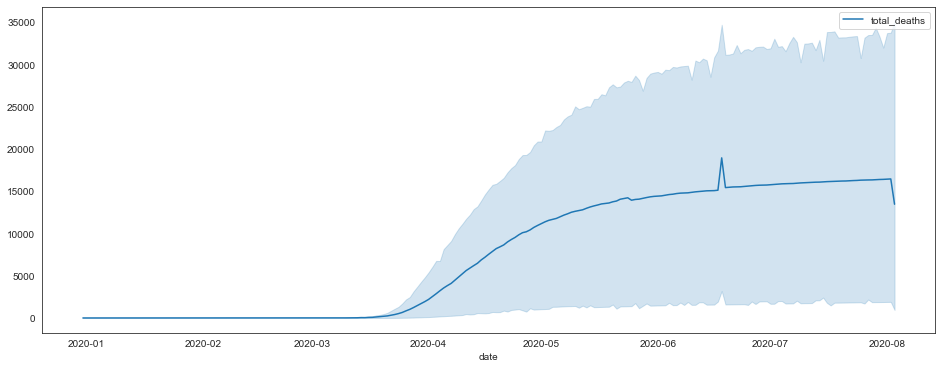

In [28]:
#Set the width and height of the figure
# Intento de grafica del pivot_table
plt.figure(figsize=(16,6))

# Line chart showing how total_deaths evolved over time 
sns.lineplot(data=new)

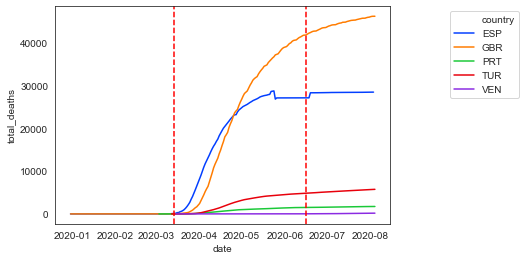

In [44]:
lp = sns.lineplot('date','total_deaths', ci=None, hue='country', palette="bright",data=covid_grupoD)
lp.legend(loc='upper right', bbox_to_anchor=(1.4,1))

# Para las líneas verticales del estado de alarma de un pais
xposition = [pd.to_datetime('2020-03-14'), pd.to_datetime('2020-06-16')]
for xc in xposition:
    lp.axvline(x=xc, color='red', linestyle='--')



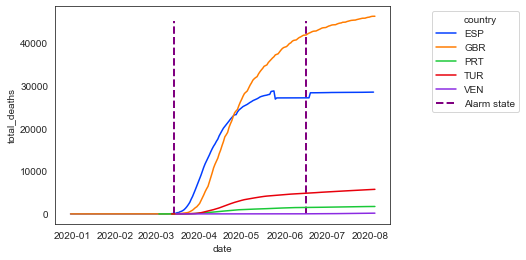

In [48]:
lp = sns.lineplot('date','total_deaths', ci=None, hue='country', palette="bright",data=covid_grupoD) # dibujo grafico
plt.vlines(x=[xposition], ymin=0, ymax=45000, colors='purple', ls='--', lw=2, label='Alarm state') # lineas verticales
lp.legend(loc='upper right', bbox_to_anchor=(1.4,1)) # cuadro de la leyenda 

In [29]:
# Otra opción para comparar dos columnas
g = sns.FacetGrid(covid_grupoD, col='total_cases', hue='country')
g = g.map(sns.lineplot, 'date', 'total_deaths', ci=None).add_legend()

ValueError: Image size of 157032x216 pixels is too large. It must be less than 2^16 in each direction.

In [34]:
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()
data.head()

,A,B,C,D
2016-01-01,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN


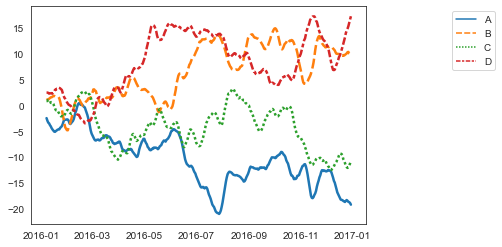

In [37]:
example = sns.lineplot(data=data, palette="tab10", linewidth=2.5) 
example.legend(loc='upper right', bbox_to_anchor=(1.4,1))

Podriamos obtener la correlación entre le nº de casos y el de muertos (supongo sera positiva y cercana a 1)